#Perceptron

A perceptron is a single-layer neural network. A perceptron takes several binary inputs, x1,x2,…, and produces a single binary output. A perceptron takes in an input, multiplies weights to each input, takes the sum of weighted inputs, and applies an activation function. Perceptron is usually used to classify the data into two parts. Therefore, it is also known as a Linear Binary Classifier.









#How Perceptron works?

The image shown below is a single layer perceptron without any hidden layers. Weights, w1,w2,…, are real numbers expressing the importance of the respective inputs to the output. The neuron's output, 0 or 1, is determined by whether the weighted sum (product of inputs with their respective weights) is less than or greater than some threshold value. Just like the weights, the threshold is a real number which is a parameter of the neuron.

The process begins by taking all the input values and multiplying them by their weights. Then, all of these multiplied values are added together to create the weighted sum. The weighted sum is then applied to the activation function, producing the perceptron's output.

Let us now understand some of the terminologies used in the perceptron.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


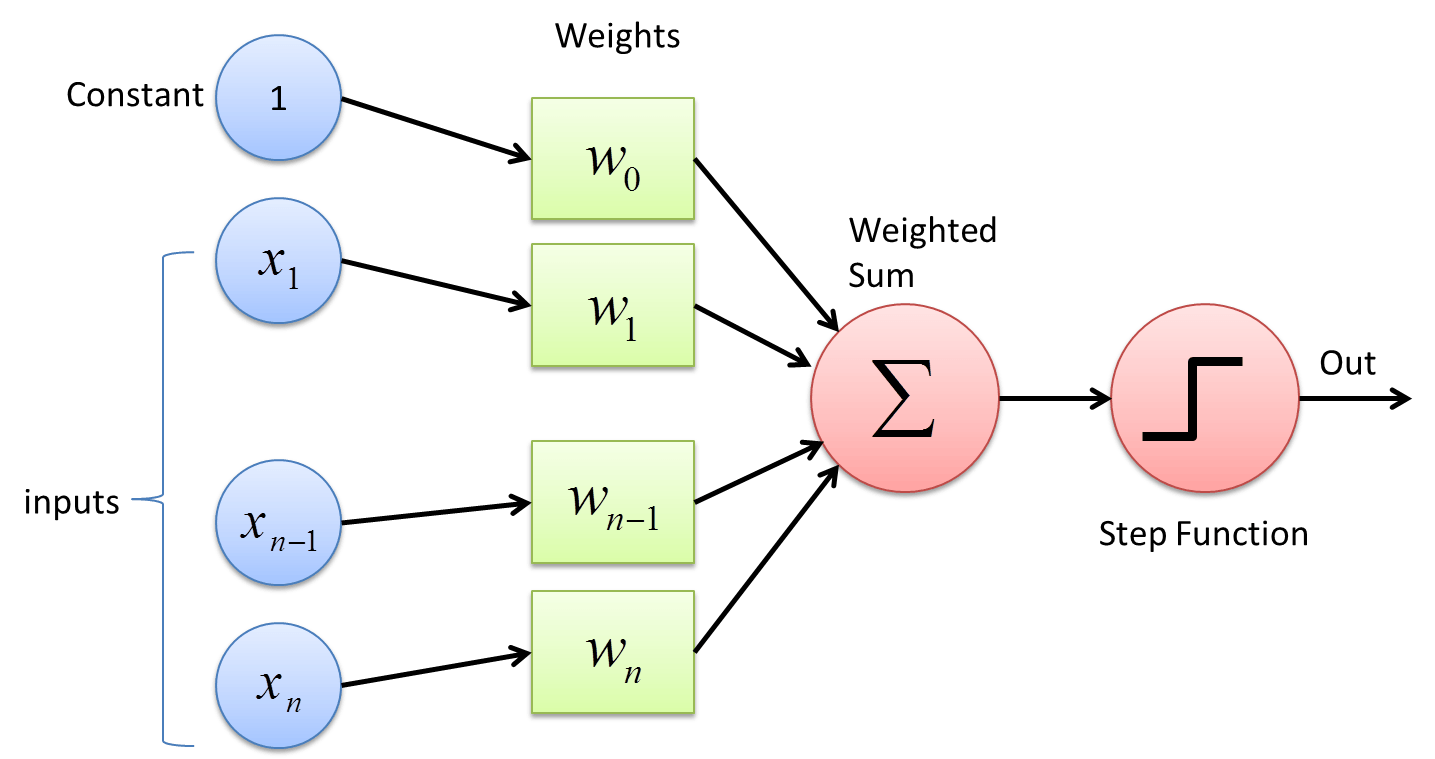

In [ ]:
from IPython.display import Image
Image ('/content/drive/MyDrive/images/day2/1.jpg')

image source- https://deepai.org/machine-learning-glossary-and-terms/perceptron


  ### Weights


  Weights are values that control the strength of the connection between two neurons. A weight decides how much influence the input will have on the output.

  ### Activation Functions
  Activation functions are mathematical equations that determine the output of a neural network. Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it.

  
###  Bias

  Let us say if all our input features were 0, would our output also be zero? Is it possible there is some base value upon which your features have an effect.  The bias unit guarantees that even when all the inputs are zeros there will still be an activation in the neuron.
 


###Limitations of perceptron

One limitation of perceptrons is that they can only solve linearly separable problems. We can only perform binary classification using perceptrons.


#Single Layer perceptron for logical AND gate

Now that we have a good understanding of how perceptrons works, let us now build a perceptron to implement logical AND gate. We will use python and numpy to implement this. A perceptron can be also be used to implement a logical OR gate.

Let’s consider the logic gates shown in the figure below. A white circle means an output of 1 and a black circle means an output of 0, and the axes indicate inputs. For example, when we input 1 and 1 to an AND gate, the output is 1, the white circle. We can create perceptrons that act like gates: they take 2 binary inputs and produce a single binary output!

We know that perceptrons are limited to solving problems that are linearly separable. If two classes are linearly separable, this means that we can draw a single line to separate the two classes. We can do this easily for the AND and OR gates, but there is no single line that can separate the classes for the XOR gate! This means that we can’t use our single-layer perceptron to model an XOR gate.

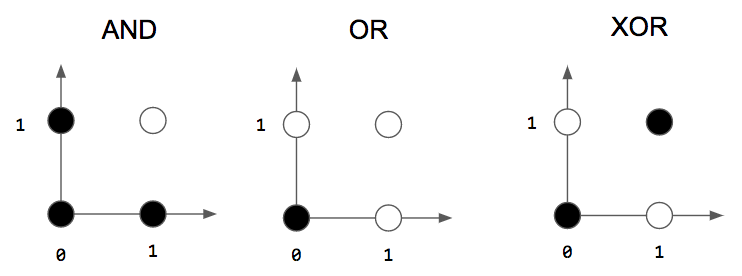

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/images/day2/2.png')

image source- https://pythonmachinelearning.pro/perceptrons-the-first-neural-networks/

In the image shown below you can see that everything on one side of the line belongs to one class and everything on the other side belongs to the other class. This line is called the decision boundary, and, when we use a single-layer perceptron, we can only produce one decision boundary

For non linearly seperable problems we organize multiple perceptrons into layers by using an intermediate layer(hidden layer)

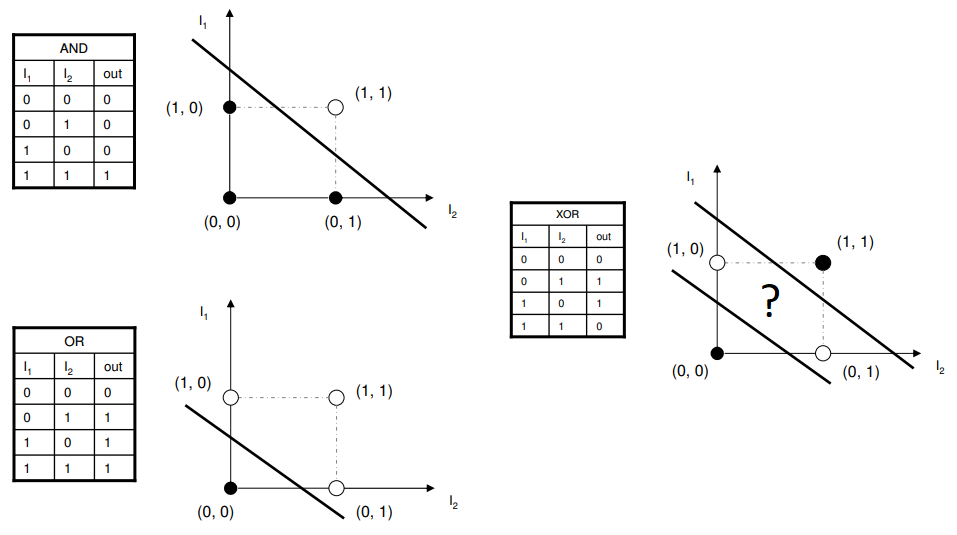

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/images/day2/3-1.png')

image source-https://medium.com/@lucaspereira0612/solving-xor-with-a-single-perceptron-34539f395182

Before building the perceptron let us see a quickly take a look at the truth table for AND gate. In an AND gate the output is 1 only if both the inputs are 1 otherwise it is 0.

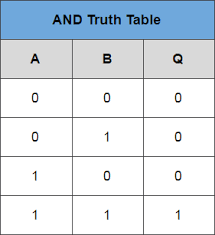

In the code that we are about to write, our goal is to calculate the proper values of the weight vectors .

###Importing required libraries

In [ ]:
import numpy as np

### Creating our perceptron class

In order to construct our perceptron, we need to know how many inputs there are to create our weight vector. The reason we add one to the input size is to include the bias in the weight vector.

In [ ]:
class Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size):
        self.W = np.zeros(input_size+1)

Here we are implementing our activation function. We return 1 if the input is greater than or equal to 0 and 0 otherwise.

In [ ]:
def activation_fn(self, x):
    return 1 if x >= 0 else 0

Finally, we need a function to run an input through the perceptron and return an output. This step is called prediction. We add the bias into the input vector. Then we can simply compute the inner product and apply the activation function.

In [ ]:
def predict(self, x):
    x = np.insert(x, 0, 1)
    z = self.W.T.dot(x)           #transposing the weight vector and applying dot product
    a = self.activation_fn(z)     #applying activation function to the previous calculated dot product
    return

All of these are functions of the Perceptron class that we’ll use for perceptron learning.

We’ve defined a perceptron, but how do perceptrons learn? We change the weight vector and bias. The weight vector is a parameter to the perceptron: we need to keep changing it until we can correctly classify each of our inputs. Keeping this in mind, we need to write an update rule for our weight vector so that we can appropriately change it:

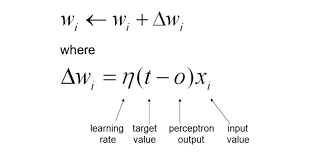

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/images/day2/5.png')

image source- https://dzone.com/articles/perceptron-explained-using-python-example-data-ana


We have to determine a good Delta w that does what we want. First, we can define the error as the difference between the desired output t and the predicted output O.
e = t - O,

where t is the target value and O is the perceptron output.
 
 We multiply this with the input to tell our perceptron to change our weight vector in proportion to our input.








 There is a hyperparameter n(eta) that is called the learning rate. It is just a scaling factor that determines how large the weight vector updates should be. This is a hyperparameter because it is not learned by the perceptron , but we select this parameter.

  When the error  is 0, i.e., the output is what we expect, then we don’t change the weight vector at all. When the error is nonzero, we update the weight vector accordingly.

Before we code the learning algorithm, we need to make some changes to our init function to add the learning rate and number of epochs as inputs.

### Learning rate

  This is used to limit the amount each weight is corrected each time it is updated.
  
### Epochs

  The number of times to run through the training data while updating the weight


In [ ]:
def __init__(self, input_size, lr=1, epochs=10):
    self.W = np.zeros(input_size+1)
    # add one for bias
    self.epochs = epochs
    self.lr = lr

Now we can create a function, given inputs and desired outputs, run our perceptron learning algorithm. We keep updating the weights for a number of epochs, and iterate through the entire training set. We insert the bias into the input when performing the weight update. Then we can create our prediction, compute our error, and perform our update rule.

In [ ]:
def fit(self, X, d):
    for _ in range(self.epochs):
        for i in range(d.shape[0]):
            y = self.predict(X[i])
            e = d[i] - y
            self.W = self.W + self.lr * e * np.insert(X[i], 0, 1)

The entire code for our perceptron is shown below.

In [ ]:
class  Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size+1)
        # add one for bias
        self.epochs = epochs
        self.lr = lr
    
    def activation_fn(self, x):
        #return (x >= 0).astype(np.float32)
        return 1 if x >= 0 else 0
 
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

Now that we have our perceptron coded, we can try to give it some training data and see if it works! So we will give the inputs of an AND gate along with the outputs. Here’s a set of inputs and outputs.

In [ ]:
if __name__ == '__main__':
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    d = np.array([0, 0, 0, 1])
 
    perceptron = Perceptron(input_size=2)
    perceptron.fit(X, d)
    print(perceptron.W)

[-3.  2.  1.]


At the end, we print the weight vector. Using the AND gate data, we should get a weight vector of [-3, 2, 1]. This means that the bias is -3 and the weights are 2 and 1 for inputs x1 and x2, respectively

To verify this weight vector is correct, we can try going through a few examples. If both inputs are 0, then the pre-activation will be 

-3+(0x2)+(0x1) = -3. 

When applying our activation function,( 0 if output is greater than or equal to 0 and 1 otheriwse) we get 0, which is exactly 0 AND 0!

So now we have an idea of how the perceptron algorithm works....

While designing a Neural Network, in the beginning, we initialize weights with some random values but it is not neccessary that whatever value we have selected for weights are going to provide us the desired results.Suppose we have selected some weight values but in the end the output value varies greatly with the desired output.. how shall we reduce the error in that case?

we need to somehow explain the model to change the parameters (weights), such that error becomes minimum.One way of doing this is by using **backpropagation**


---
#  Backpropagation



let us consider a simple example by referring the following table-


| i  | y  |y'   |e   |   |
|---|---|---|---|---|
|  1 | 2 |4  |  2 |   |
|   |   |   |   |   |

where,

*   i= input
*   y= desired output
*   y'=obtained output
*   e= error/cost

now for a particular value of weight (say w=2) we got the output as 4 whereas the desired output was 2. The error would be the difference between the desired value and obtained value which comes out to be 2.
So from this we can say that we need to change the value of weight to get the desired output. 

|  i | y  | y'  |  e |   |
|---|---|---|---|---|
| 1  |2  | 6  | 4  |   |
|   |   |   |   |   |

here we updated the weight(say w=3) and observe that the error increased.
So, obviously there is no point in increasing the value of ‘W’ further.Suppose we put w=1

| i  |  y |  y' | e  |   |
|---|---|---|---|---|
|  1 |  2 | 3  |  1 |   |
|   |   |   |   |   |

The error has reduced.
We first initialized some random value to ‘W’ .
and noticed that the output was different from the desired output or there is some error. To reduce that error, we propagated backwards and increased the value of ‘W' and  noticed that the error has increased from which we concluded that we cannot increase the value of weights.
So, we again propagated backwards and decreased ‘W’ value and noticed that the error has reduced.So the main idea is to figure out whether we need to increase or decerease the weights. Once we figure out whether we need to either decrrease or increase we need to keep moving in that direction until we get the minimum error which mathematically means that we need to find the minima of the error funtion





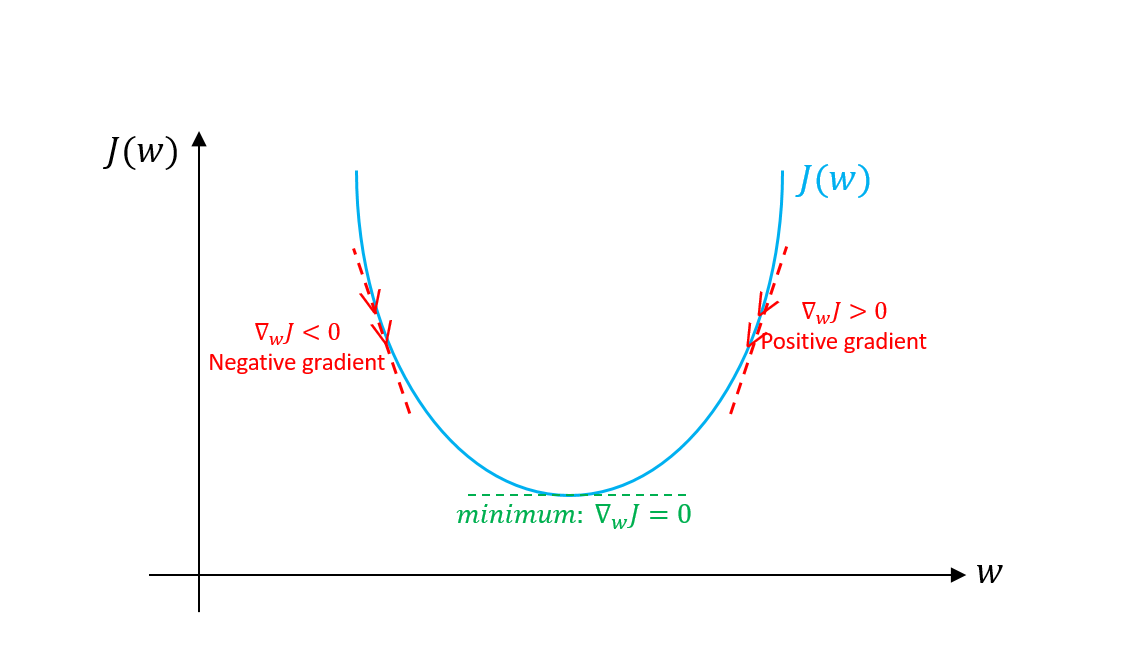

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/images/day2/6.png')

image source- https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3



Here is a simple example of how backpropagation algorithm works using gradient descent




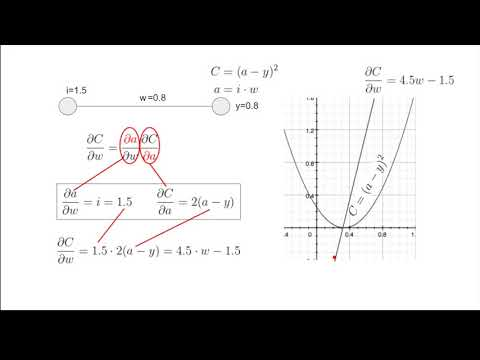

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('khUVIZ3MON8')